#### Creating a historgram from data & converting to probability density
#### Proportion vs. probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

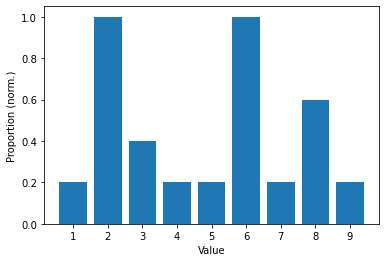

In [2]:
data = [1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 6, 6, 6, 6, 7, 8, 8, 8, 9]

#plt.hist(data)
#plt.xlabel('Value')
#plt.ylabel('Number of appearance (count)')
#plt.show()

y, x = np.histogram(data, bins=np.arange(1,11))
yP = y/np.max(y)

plt.bar(x[:-1], yP)
plt.xlabel('Value')
plt.ylabel('Proportion (norm.)')
plt.xticks(np.arange(1, 10))
plt.show()


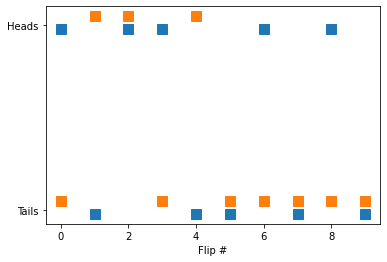

In [21]:
faircoin = .5
biascoin = .9

nTrials = 10

results = np.zeros((2, nTrials))

for i in range(0, nTrials):
    results[0,i] = np.random.rand()>faircoin
    results[1,i] = np.random.rand()>biascoin
    
plt.plot(results[0,:]-.02, 's', markersize=10, label='fair coin')
plt.plot(results[1,:]+.05, 's', markersize=10, label='bias coin')
plt.xlabel('Flip #')
plt.yticks([0, 1], ['Tails', 'Heads'])
plt.show()

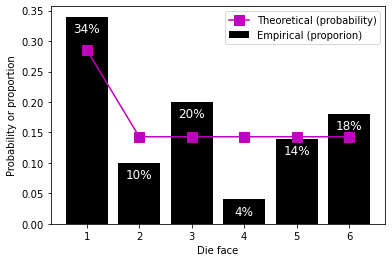

In [41]:
n = 50
outcomes = np.zeros(6)
pureprobs = np.array([2, 1, 1, 1, 1, 1])
pureprobs = pureprobs / np.sum(pureprobs)

for i in range(n):
    # roll a 7-sided die
    dieroll = np.random.randint(0, 7)
    # make die biased
    if dieroll == 6:
        dieroll = 0
        
    outcomes[dieroll] += 1
    
plt.bar(range(1,7), outcomes/n, color='k', label='Empirical (proporion)')
plt.plot(range(1,7), pureprobs, 'ms-', markersize=10, label='Theoretical (probability)')
plt.xlabel('Die face')
plt.ylabel('Probability or proportion')
plt.legend()


for i in range(1, 7):
    plt.text(i, outcomes[i-1]/n-.025, '%s%%' %int(100*outcomes[i-1]/n), color='w', fontsize=12, horizontalalignment='center')

plt.show()

#### Building distributions from random numbers.

Mean is 4.99982, range is 1.99297


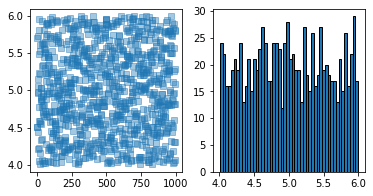

In [27]:
shift = 5
stretch = 2
n = 1000

# normal distribution
# pnts = np.random.randn(n)*stretch + shift
# print('Mean is %g, std is %g' %(np.mean(pnts), np.std(pnts)))

# uniform distribution
pnts = np.random.rand(n) * stretch + shift - .5 * stretch
print('Mean is %g, range is %g' %(np.mean(pnts), np.max(pnts)-np.min(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6,3))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, 50, edgecolor='k')

plt.show()

Mean is 3.443, variance is 3.37875


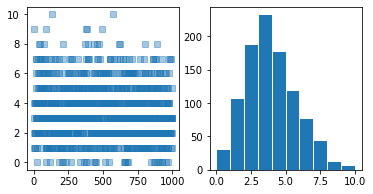

In [28]:
lam = 3.4
n = 1000
pnts = np.random.poisson(lam, n)

print('Mean is %g, variance is %g' %(np.mean(pnts), np.var(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6,3))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, bins=np.arange(0, np.max(pnts)+1), edgecolor='w')

plt.show()

#### The central limit theorem

* Random samples form independent variables will tend towards a normal (Gaussian) didtribution,
enven if the variables are non-normally distributed.

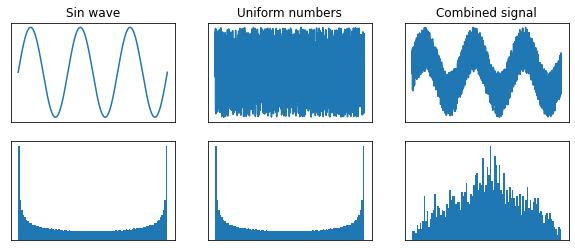

In [35]:
n = 2000

sig1 = np.sin(np.linspace(0, 6*np.pi, n))
sig2 = np.random.rand(n)*2-1

combi = sig1 + sig2

# plot the individual signals and their distribution
fig, ax = plt.subplots(2, 3, figsize=(10,4))

ax[0,0].plot(sig1)
ax[0,0].set_title('Sin wave')
ax[1,0].hist(sig1, 100)

ax[0,1].plot(sig2)
ax[0,1].set_title('Uniform numbers')
ax[1,1].hist(sig1, 100)

ax[0,2].plot(combi)
ax[0,2].set_title('Combined signal')
ax[1,2].hist(combi, 100)

for i in np.matrix.flatten(ax):
    i.set_xticks([])
    i.set_yticks([])
    
plt.show()

/Users/pawelztef/opt/anaconda3/envs/datas/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


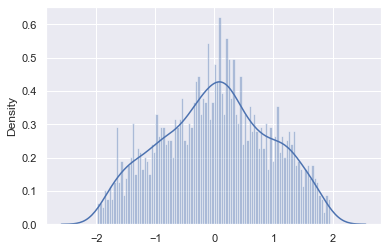

In [39]:
import seaborn as sns

sns.set()
sns.distplot(combi, 100)
plt.show()

#### Joint probability distributions

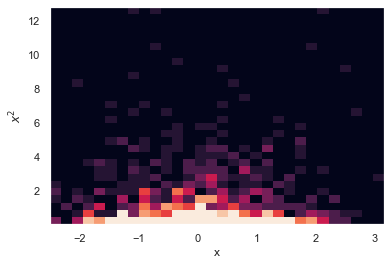

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

n = 1000
x = np.random.randn(n)
y = np.random.randn(n)**2

plt.grid(False)
plt.hist2d(x, y, 30, vmax=10)
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.show()

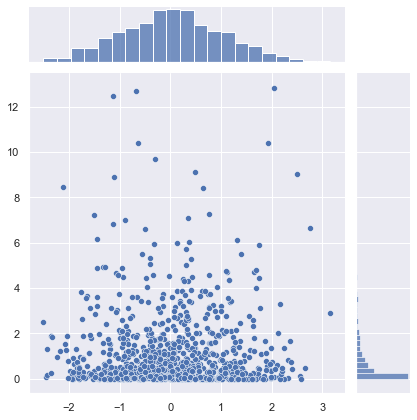

In [44]:
# marginal distribution
sns.set()
sns.jointplot(x=x, y=y)
plt.show()